In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fraud=pd.read_csv('Fraud_check1.csv')

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud=pd.get_dummies(fraud,columns=['Marital.Status','Undergrad','Urban'],drop_first=True)

In [6]:
fraud

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES
0,68833,50047,10,False,True,False,True
1,33700,134075,18,False,False,True,True
2,36925,160205,30,True,False,False,True
3,50190,193264,15,False,True,True,True
4,81002,27533,28,True,False,False,False
...,...,...,...,...,...,...,...
595,76340,39492,7,False,False,True,True
596,69967,55369,2,False,False,True,True
597,47334,154058,0,False,False,False,True
598,98592,180083,17,True,False,True,False


In [7]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
fraud

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES,TaxInc
0,68833,50047,10,False,True,False,True,Good
1,33700,134075,18,False,False,True,True,Good
2,36925,160205,30,True,False,False,True,Good
3,50190,193264,15,False,True,True,True,Good
4,81002,27533,28,True,False,False,False,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,False,False,True,True,Good
596,69967,55369,2,False,False,True,True,Good
597,47334,154058,0,False,False,False,True,Good
598,98592,180083,17,True,False,True,False,Good


In [9]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [10]:
fraud

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES,TaxInc_Good
0,68833,50047,10,False,True,False,True,True
1,33700,134075,18,False,False,True,True,True
2,36925,160205,30,True,False,False,True,True
3,50190,193264,15,False,True,True,True,True
4,81002,27533,28,True,False,False,False,True
...,...,...,...,...,...,...,...,...
595,76340,39492,7,False,False,True,True,True
596,69967,55369,2,False,False,True,True,True
597,47334,154058,0,False,False,False,True,True
598,98592,180083,17,True,False,True,False,True


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\MD SUFIYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


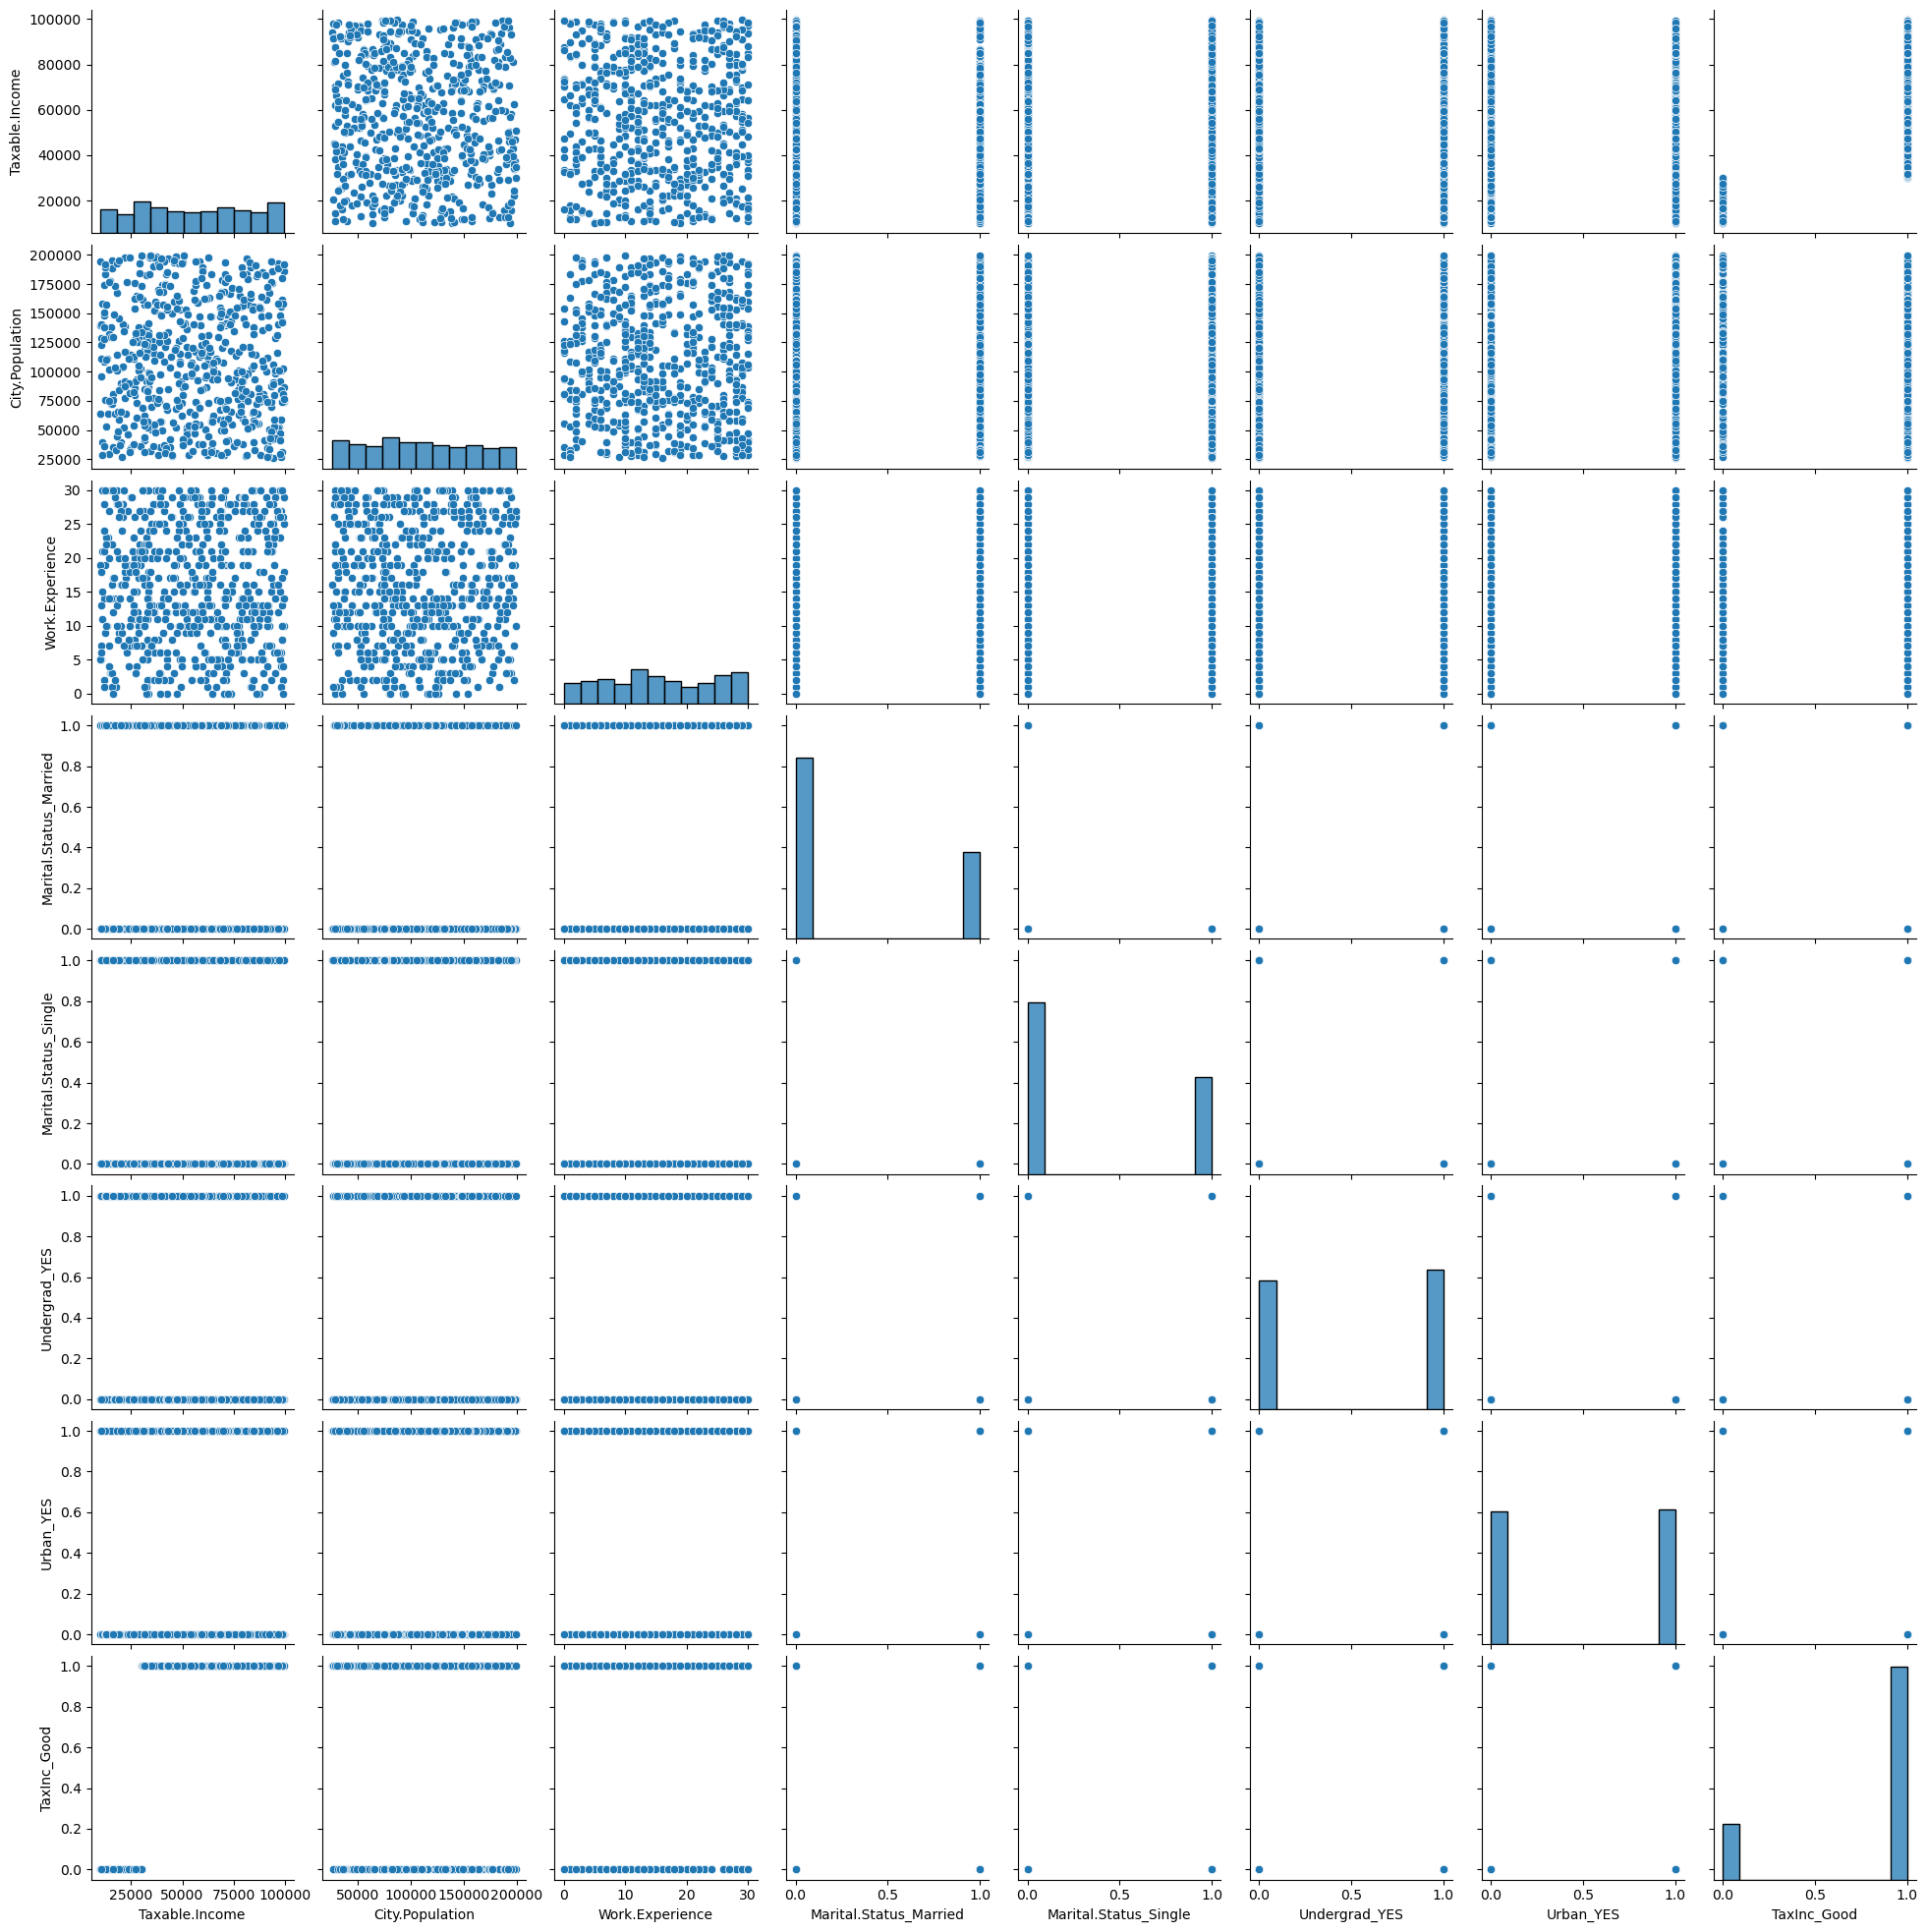

In [11]:
import seaborn as sns
sns.pairplot(fraud)

In [12]:
#normalization function
def norm_func(i):
    x=(i-i.min()/i.max()-i.min())
    return(x)

In [13]:
norm=norm_func(fraud.iloc[:,1:3])

In [14]:
norm

,City.Population,Work.Experience
0,24267.870962,10.0
1,108295.870962,18.0
2,134425.870962,30.0
3,167484.870962,15.0
4,1753.870962,28.0
...,...,...
595,13712.870962,7.0
596,29589.870962,2.0
597,128278.870962,0.0
598,154303.870962,17.0


In [15]:
fraud1=fraud.iloc[3:8]

In [16]:
Fraud=pd.concat([norm,fraud1])

In [17]:
x = Fraud.drop(['TaxInc_Good'], axis=1)
y = Fraud['TaxInc_Good']

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
Fraud["income"]="<=30000"
Fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
Fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [20]:
fraud.drop(['Taxable.Income'],axis=1,inplace=True)

In [21]:
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [22]:
fraud

,population,experience,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES,TaxInc_Good
0,50047,10,False,True,False,True,True
1,134075,18,False,False,True,True,True
2,160205,30,True,False,False,True,True
3,193264,15,False,True,True,True,True
4,27533,28,True,False,False,False,True
...,...,...,...,...,...,...,...
595,39492,7,False,False,True,True,True
596,55369,2,False,False,True,True,True
597,154058,0,False,False,False,True,True
598,180083,17,True,False,True,False,True


In [25]:
x.isna().sum()

City.Population             0
Work.Experience             0
Taxable.Income            600
Marital.Status_Married    600
Marital.Status_Single     600
Undergrad_YES             600
Urban_YES                 600
dtype: int64

In [26]:
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

# Building a decision tree classifier using a entropy criteria

In [43]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

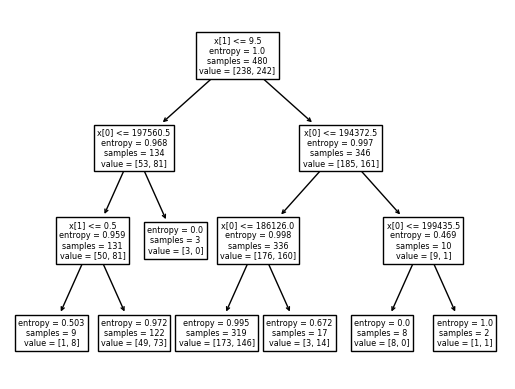

In [44]:
#PLot the decision tree
tree.plot_tree(model);

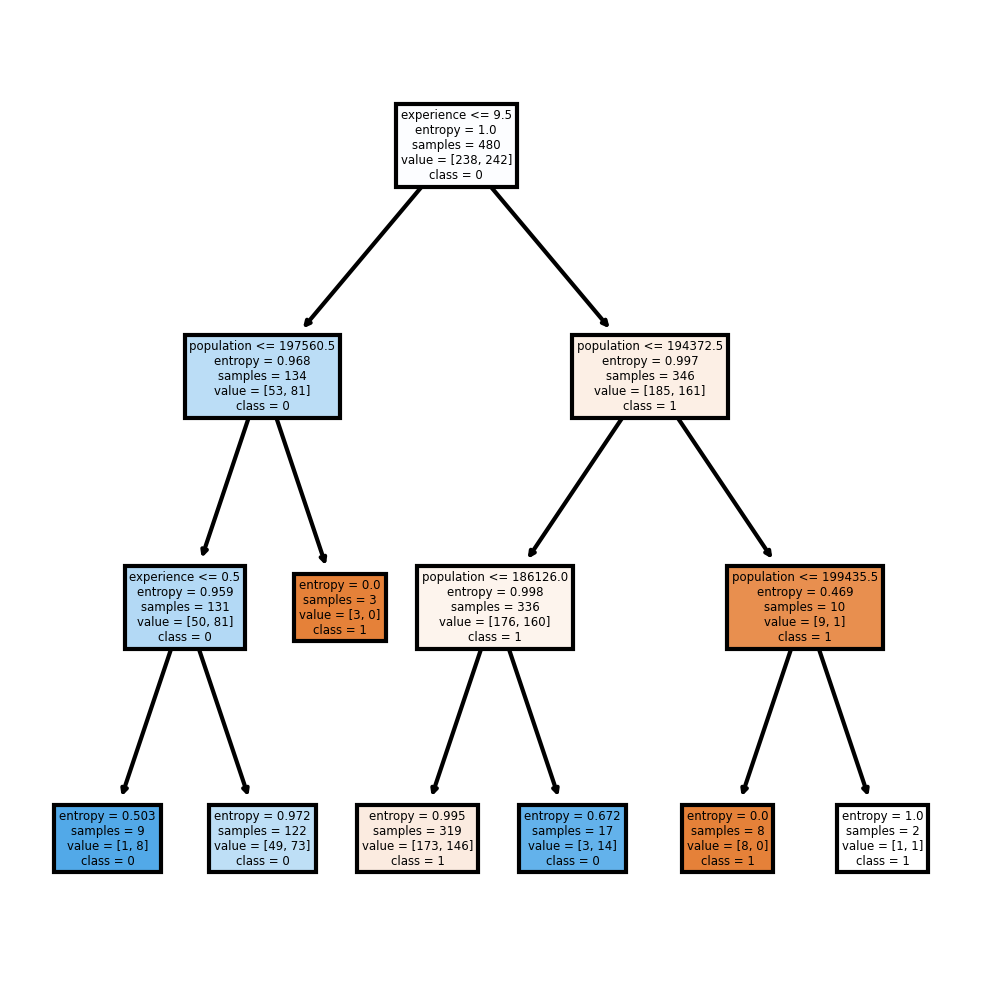

In [45]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
#Predicting on test data
preds = model.predict(Xtest) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

False    89
True     31
Name: count, dtype: int64

In [48]:
pd.crosstab(Ytest,preds)

col_0,False,True
Urban_YES,,
False,45,15
True,44,16


In [50]:
#Accuracy
np.mean(preds==Ytest)

0.5083333333333333

# Building a decision tree classifier using Gini Criteria

In [52]:
from sklearn.tree import DecisionTreeClassifier
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [53]:
gini_model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(max_depth=3)

In [54]:
#prediction
predict=model.predict(Xtest)
#Accuracy
np.mean(predict==Ytest)

0.5083333333333333

# Decision Tree Regression

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
array=fraud.values

In [58]:
xx=array[:,0:3]
yy=array[:,3]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.33,random_state=1)

In [61]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [62]:
#accuracy
model.score(x_test,y_test)

-0.41108597285067905